In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, confusion_matrix, classification_report, accuracy_score
from sklearn.cluster import KMeans

from pandas.api.types import is_string_dtype
from pandas.api.types import is_categorical_dtype

In [57]:
def pre_processing(credit):
	# preprocessing - convert data type and dummy coding
	cols = credit.columns
	isCat_Index = list()
	for col in cols:
		if is_string_dtype(credit[col]):
			credit[col] = credit[col].astype('category')
		isCat_Index.append(is_categorical_dtype(credit[col]))
	
	credit_d = pd.get_dummies(credit, columns=list(cols[isCat_Index]))
	print(credit_d.shape)
	return credit_d

In [72]:
SEED = 166

# preprocessing: scaling the data and split dataset
data = pd.read_csv("../credit.csv")
data = pre_processing(data)
predictors = data[data.columns.difference(["default"])]
scaler = MinMaxScaler()
predictors_scaled = scaler.fit_transform(predictors)
target = data[["default"]].values.ravel()

train_X, test_X, train_y, test_y = train_test_split(predictors_scaled, target, train_size=0.8, random_state=SEED, stratify=target)

# in clustering experiments, only use training set
data, label = train_X, train_y

(1000, 62)


In [59]:
# Choosing the optimal k with two metrics - one is inertia, another is Silhouette Coefficient
k_grid = np.arange(1, 62)
loss1 = np.zeros(k_grid.size)
loss2 = np.zeros(k_grid.size)
for idx, k in enumerate(k_grid):
    print ("k = ", k)
    kmeans = KMeans(n_clusters=k, random_state=SEED)
    kmeans.fit(data)
    loss1[idx] = kmeans.inertia_
    if k > 1:
        loss2[idx] = silhouette_score(data, kmeans.labels_)

k =  1
k =  2
k =  3
k =  4
k =  5
k =  6
k =  7
k =  8
k =  9
k =  10
k =  11
k =  12
k =  13
k =  14
k =  15
k =  16
k =  17
k =  18
k =  19
k =  20
k =  21
k =  22
k =  23
k =  24
k =  25
k =  26
k =  27
k =  28
k =  29
k =  30
k =  31
k =  32
k =  33
k =  34
k =  35
k =  36
k =  37
k =  38
k =  39
k =  40
k =  41
k =  42
k =  43
k =  44
k =  45
k =  46
k =  47
k =  48
k =  49
k =  50
k =  51
k =  52
k =  53
k =  54
k =  55
k =  56
k =  57
k =  58
k =  59
k =  60
k =  61


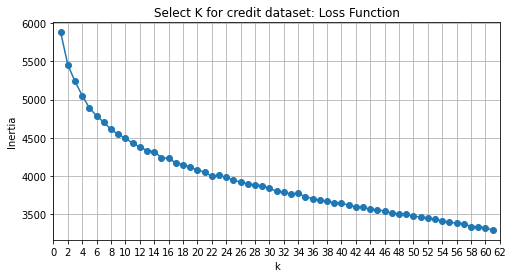

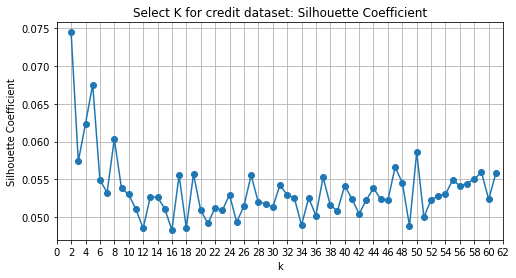

In [60]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

# Plot loss vs k to find best k
plt.figure(figsize=(8,4))
plt.plot(k_grid, loss1,'-o')
plt.xticks(k_grid)
x_major_locator=MultipleLocator(2)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

plt.xlabel('k')
plt.ylabel('Inertia')
plt.xlim(0, 62)
plt.title('Select K for credit dataset: Loss Function')
plt.grid()
plt.savefig('../plots/kmeans_credit_loss_1.png', dpi=300)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(k_grid[1:], loss2[1:], marker='o')
plt.xticks(k_grid)
x_major_locator=MultipleLocator(2)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

plt.xlabel('k')
plt.ylabel('Silhouette Coefficient')
plt.xlim(0, 62)
plt.title('Select K for credit dataset: Silhouette Coefficient')
plt.grid()
plt.savefig('../plots/kmeans_credit_loss_2.png', dpi=300)
plt.show()

In [66]:
kmeans = KMeans(n_clusters=5, random_state=SEED)
kmeans.fit(data)
# Visualize the clustering effect
correlation = []
shape = data.shape
for i in range(shape[1]):
    c = np.corrcoef(data[:, i], kmeans.labels_)
    correlation.append(c[0, 1])
print(correlation)
print(np.argsort(np.array(correlation)))
print(np.sort(np.array(correlation)))

[0.18388237649848174, 0.0279016207788685, -0.013115799276028847, 0.07084920474414512, 0.0067822718673475986, -0.05512812350041269, 0.043399028603271245, 0.027388895592711106, 0.01678538580483637, -0.0025777124559696937, -0.06093432849871419, 0.07414188165161884, -0.09455349414572435, -0.021103136998738847, -0.07472267987372945, 0.13455353182710272, 0.06224874728502248, -0.024973078319364246, -0.008159742342187058, 0.008159742342187073, 0.5424137581593726, 0.09628106180423178, -0.5431220306829306, 0.0918822447373137, -0.07349680160732554, -0.017100036151574387, 0.11449081955333135, -0.04632285324263301, 0.09733094020681013, 0.007871527253657777, -0.0802965691414902, 0.10649415238041085, 0.02363756399508086, -0.019089827608539806, 0.00012959537986802135, -0.04024187890018278, -0.20842561468859785, -0.11308274885438849, 0.27818812724495445, -0.09705999651753401, -0.1741357641513329, -0.10321333967505884, 0.4748958885208379, -0.0870346083383729, 0.005932830838036824, 0.0035556361484452266,

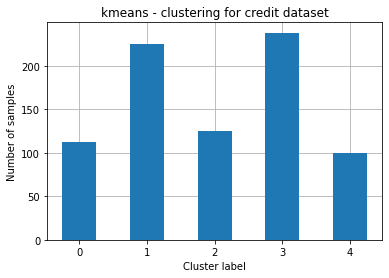

In [70]:
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt

# fig = plt.figure(1, figsize=(4, 3))
# ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)

# ax.scatter(data[kmeans.labels_==0, 22], data[kmeans.labels_==0, 20], data[kmeans.labels_==0,42], c='blue', edgecolor="k", label=("cluster 1"))
# ax.scatter(data[kmeans.labels_==1, 22], data[kmeans.labels_==1, 20], data[kmeans.labels_==1,42], c='red', edgecolor="k", label=("cluster 2"))
# ax.scatter(data[kmeans.labels_==2, 22], data[kmeans.labels_==2, 20], data[kmeans.labels_==2,42], c='pink', edgecolor="k", label=("cluster 1"))
# ax.scatter(data[kmeans.labels_==3, 22], data[kmeans.labels_==3, 20], data[kmeans.labels_==3,42], c='yellow', edgecolor="k", label=("cluster 2"))
# ax.scatter(data[kmeans.labels_==4, 22], data[kmeans.labels_==4, 20], data[kmeans.labels_==4,42], c='gray', edgecolor="k", label=("cluster 1"))

# ax.set_xlabel("alcohol")
# ax.set_ylabel("fixed acidity")
# ax.set_zlabel("residual sugar")
# ax.legend(loc='best')
# fig.savefig('../plots/kmeans_credit_cluster.png', dpi=300)
# fig.show()


plt.figure()
plt.hist(kmeans.labels_, bins=np.arange(0, 5 + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, 5))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.title('kmeans - clustering for credit dataset')
plt.grid()
plt.savefig('../plots/kmeans_credit_cluster.png', dpi=300)

In [63]:
# print(label)
# print(1 - kmeans.labels_)
print(completeness_score(label, kmeans.labels_), homogeneity_score(label, kmeans.labels_))
print(accuracy_score(label, kmeans.labels_))

0.002381593460323502 0.0026178467686361544
0.41


In [75]:
kmeans = KMeans(n_clusters=5, random_state=SEED)
kmeans.fit(data)

KMeans(n_clusters=5, random_state=166)

In [76]:
print(completeness_score(label, kmeans.labels_), homogeneity_score(label, kmeans.labels_))
print(accuracy_score(label, kmeans.labels_))
print(silhouette_score(data, kmeans.labels_))

0.009182088845236702 0.023188388833828576
0.25875
0.06755968823458486
